In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = dataset.iloc[:, [3, 4]].values

In [19]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 59


In [23]:
labels

array([ 0,  1,  2,  1,  0,  1,  2,  4,  2,  1,  3,  4,  3,  1,  3,  1,  6,
        5,  9,  4,  6,  7, 11,  7, 13,  8,  9, 10,  9,  8, 11, 14, 11, 12,
       13,  8, 13, 14, 15, 14, 16, 12, 16, 17, 15, 17, 18, 19, 19, 19, 18,
       17, 18, 17, 19, 19, 21, 19, 21, 19, 20, 18, 21, 20, 21, 20, 21, 21,
       20, 21, 20, 23, 21, 20, 24, 22, 22, 24, 22, 23, 22, 22, 23, 24, 22,
       24, 25, 25, 25, 24, 28, 26, 27, 26, 26, 28, 27, 27, 26, 27, 26, 27,
       28, 28, 28, 26, 27, 27, 29, 27, 28, 28, 29, 27, 27, 27, 29, 30, 29,
       30, 30, 29, 30, 34, 32, 31, 32, 34, 33, 31, 33, 31, 32, 31, 33, 35,
       33, 31, 33, 31, 33, 34, 36, 35, 37, 34, 36, 38, 37, 35, 37, 35, 37,
       38, 37, 35, 39, 38, 39, 38, 36, 35, 39, 34, 40, 43, 40, 41, 40, 43,
       42, 43, 42, 41, 42, 41, 42, 43, 42, 45, 44, 45, 49, 45, 46, 47, 50,
       48, 49, 45, 50, 48, 51, 52, 53, 54, 55, 56, 57, 58], dtype=int64)

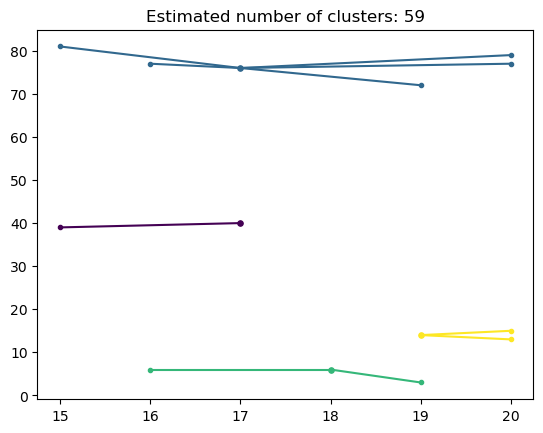

In [21]:
plt.close("all")
plt.figure(1)
plt.clf()
colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [25]:
supervised=dataset

In [29]:
supervised['Cluster_group']=labels

In [31]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,54
196,197,Female,45,126,28,55
197,198,Male,32,126,74,56
198,199,Male,32,137,18,57


In [33]:
supervised.to_csv("Affinity_cluster.csv",index=False)

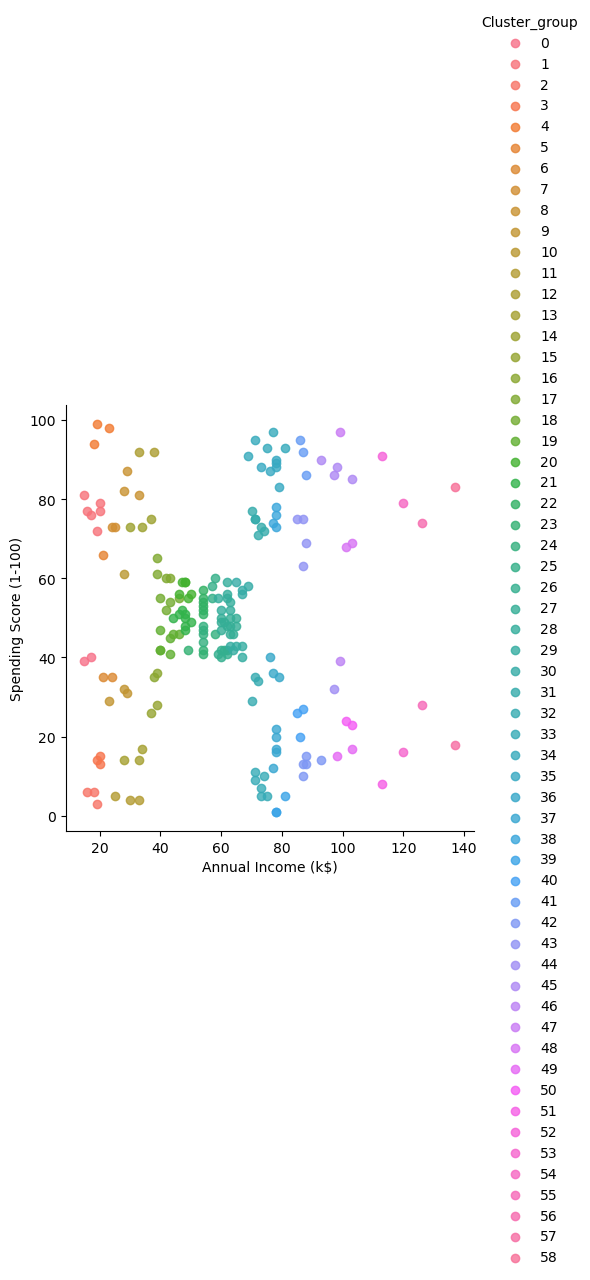

In [35]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True)